In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
import random 
import matplotlib.image as mpimg

In [18]:
print("Tensorflow version =",tf.__version__)
print("Pandas version =",pd.__version__)
print("Numpy version =",np.version.version)

Tensorflow version = 2.16.2
Pandas version = 2.2.2
Numpy version = 1.26.4


***Getting to know our Data***

In [71]:
def view_random_pic(target_dir,target_class):
    """Takes a target directory and a target class and displays random pictures"""
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img
    

['668944.jpg']


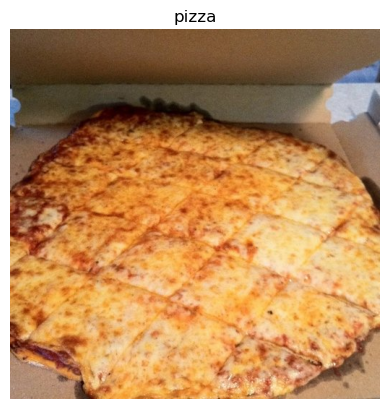

In [72]:
img = view_random_pic("/CNN/pizza_steak(Binary)/train/", "pizza")

['2425062.jpg']


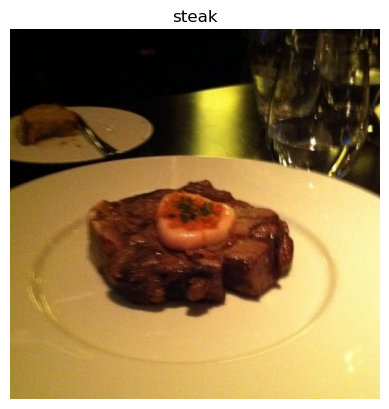

In [74]:
img = view_random_pic("/CNN/pizza_steak(Binary)/train/", "steak")

**Getting Data ready**

In [50]:
train_datagen = ImageDataGenerator(rescale=1./512,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./412,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

train_dir = "/CNN/pizza_steak(Binary)/train"
test_dir = "/CNN/pizza_steak(Binary)/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(512,512),class_mode="binary",seed=42,shuffle=True)
test_data = test_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(512,512),class_mode="binary",seed=42,shuffle=True)
len(train_data),len(test_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(47, 16)

**Actually making the model**

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',input_shape=(512,512,3),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

/Users/veerjyotsammi/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
history = model.fit(train_data,
                    epochs=32,
                    validation_data=test_data)

Epoch 1/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5675 - loss: 0.6928 - val_accuracy: 0.5180 - val_loss: 0.6847
Epoch 2/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5760 - loss: 0.6835 - val_accuracy: 0.7400 - val_loss: 0.6030
Epoch 3/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6986 - loss: 0.5929 - val_accuracy: 0.7680 - val_loss: 0.5069
Epoch 4/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7628 - loss: 0.5090 - val_accuracy: 0.8160 - val_loss: 0.4637
Epoch 5/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8102 - loss: 0.4729 - val_accuracy: 0.8080 - val_loss: 0.4352
Epoch 6/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7746 - loss: 0.4772 - val_accuracy: 0.8320 - val_loss: 0.4191
Epoch 7/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7925 - loss: 0.4681 - val_accuracy: 0.8280 - val_loss: 0.3915
Epoch 8/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7959 - loss: 0.4584 - val_accuracy: 0.8160 - val_loss:

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 508, 508, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 250, 250, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 123, 123, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,185 (504.63 KB)

 Trainable params: 129,185 (504.63 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
pd.DataFrame(history.history).plot(figsize=(10,5))

NameError: name 'history' is not defined

In [44]:
model.save("CNN(Binary).keras")

In [45]:
model = tf.keras.models.load_model("CNN(Binary).keras")

/Users/veerjyotsammi/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 58 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**Making prediction on custom Images**

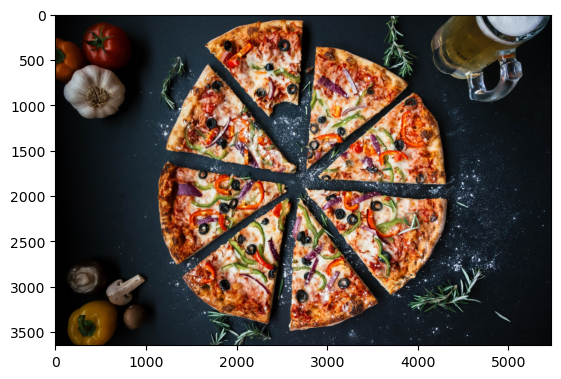

In [57]:
pizza = mpimg.imread("CustomPizza.jpg")
plt.imshow(pizza)

In [55]:
class_names = ['steak','pizza']
def load_and_prep_image(filename , img_shape = 512):
    """Reads image from filename ,make a tensor and reshapes it to (img_shape,img_shape,3)"""
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=(img_shape,img_shape))
    img /= 512.
    return img

def pred_and_plot(filename , model):
    img = load_and_prep_image(filename)
    plt.imshow(img)
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = class_names[int(tf.round(pred[0]))]
    plt.title(pred)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


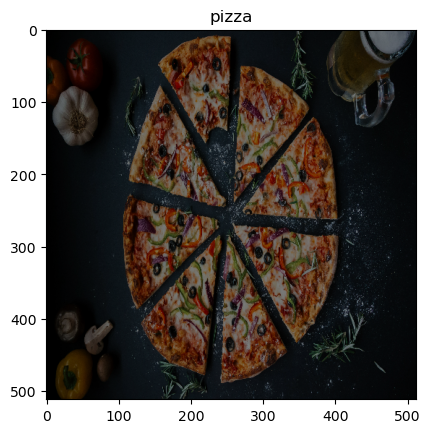

In [56]:
pred_and_plot("CustomPizza.jpg",model)

NameError: name 'class_names' is not defined